In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('D:\iith\python_scripts\SwissProt_Features.csv')

# Split the dataset into features (X) and the target (y)
X = data.drop(columns=["Sequence_ID", "Sequence", "Anti_aging","Unnamed: 0", 'Length', 'Label', 'Molecular_formula'])
y = data['Anti_aging']


# Feature selection to reduce dimensionality (select top 50 features)
selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(
    random_state=45, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    n_estimators=100,  # Default value, optimized through grid search
    max_depth=3,  # Reduced complexity
    learning_rate=0.05,  # Balanced learning rate
    subsample=0.8,  # Use subset of data to prevent overfitting
    colsample_bytree=0.8,  # Use subset of features to prevent overfitting
    reg_alpha=1,  # L1 regularization to reduce complexity
    reg_lambda=5  # L2 regularization to reduce complexity
)

<>:16: SyntaxWarning: invalid escape sequence '\i'
<>:16: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Aryan\AppData\Local\Temp\ipykernel_28328\1532782052.py:16: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_csv('D:\iith\python_scripts\SwissProt_Features.csv')
d:\iith\python_scripts\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 51 156 178 238 247 258 307 394 406] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\iith\python_scripts\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy', n_jobs=-1, min_features_to_select=20)

# Fit the model
rfecv.fit(X, y)

selected_columns = X.columns[rfecv.support_]

# Print results
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected Features: {selected_columns}")

d:\iith\python_scripts\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\iith\python_scripts\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\iith\python_scripts\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\iith\python_scripts\venv\Lib\si

Optimal number of features: 51
Selected Features: Index(['Charge_density', 'Isoelectric_point', 'Instability_index',
       'Aromaticity', 'Bomen_index', 'Hydrophobic_ratio', 'AAC_D', 'AAC_E',
       'AAC_F', 'AAC_G', 'AAC_K', 'AAC_L', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_S',
       'AAC_T', 'DPC1_GG', 'DPC1_KG', 'DPC1_PG', 'DPC1_PP', 'DPC1_PR',
       'DPC1_RT', 'PCP_PC', 'PCP_NC', 'PCP_NE', 'PCP_PO', 'PCP_NP', 'PCP_AL',
       'PCP_CY', 'PCP_HB', 'PCP_HL', 'PCP_NT', 'PCP_HX', 'PCP_SS_HE',
       'PCP_SS_ST', 'PCP_SS_CO', 'PCP_SA_EX', 'PCP_TN', 'PCP_SM', 'PCP_Z1',
       'PCP_Z2', 'PCP_Z3', 'PCP_Z4', 'PCP_Z5', 'PAAC1_D', 'PAAC1_F', 'PAAC1_G',
       'PAAC1_K', 'PAAC1_M', 'PAAC1_lam1'],
      dtype='object')


d:\iith\python_scripts\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:58:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=45, ...)

In [25]:
# make new datasets with selected features
X_train_rfe = X_train[selected_columns]
X_test_rfe = X_test[selected_columns]
X_rfe = X[selected_columns] 

#fitting model into the rfe dataset
model.fit(X_train_rfe, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=45, ...)

In [7]:
#saving features to csv file
pd.DataFrame(selected_columns, columns=["Selected Features"]).to_csv("xgbm_rfecv_selected_features.csv", index=False)

In [8]:
feature_ranks = pd.DataFrame({"Feature": X.columns, "Rank": rfecv.ranking_})
feature_ranks = feature_ranks.sort_values(by="Rank")  # Sort by importance

# Select top N features manually (e.g., 10 features)
num_features = 24
top_features = feature_ranks["Feature"].head(num_features).tolist()

# Save to CSV
pd.DataFrame(top_features, columns=["Top Features"]).to_csv("xgbm_rfecv_top_features.csv", index=False)


In [27]:
X_rfe_fr = X_rfe[top_features]
X_train_rfefr = X_train_rfe[top_features]
X_test_rfefr = X_test_rfe[top_features]

In [10]:
y_pred = model.predict(X_test_rfe)

# Evaluate the model on the training set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
test_recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
test_mcc = matthews_corrcoef(y_test, y_pred)
# Calculate specificity for the training set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity = TN / (TN + FP)

# Print results for the training set
print(f'Test Set Accuracy: {test_accuracy:.2f}')
print(f'Test Set Precision: {test_precision:.2f}')
print(f'Test Set Sensitivity (Recall): {test_recall:.2f}')
print(f'Test Set Specificity: {specificity:.2f}')
print(f'Test Set F1 Score: {test_f1:.2f}')

Test Set Accuracy: 0.85
Test Set Precision: 0.87
Test Set Sensitivity (Recall): 0.85
Test Set Specificity: 0.85
Test Set F1 Score: 0.86


In [11]:
#Make predictions on the training data
y_train_pred = model.predict(X_train_rfe)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary', pos_label=1)
train_recall = recall_score(y_train, y_train_pred, average='binary', pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, average='binary', pos_label=1)
train_mcc = matthews_corrcoef(y_train, y_train_pred)

# Calculate specificity for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_TN = train_conf_matrix[0, 0]
train_FP = train_conf_matrix[0, 1]
train_specificity = train_TN / (train_TN + train_FP)

# Print results for the training set
print(f'Training Set Accuracy: {train_accuracy:.2f}')
print(f'Training Set Precision: {train_precision:.2f}')
print(f'Training Set Sensitivity (Recall): {train_recall:.2f}')
print(f'Training Set Specificity: {train_specificity:.2f}')
print(f'Training Set F1 Score: {train_f1:.2f}')

Training Set Accuracy: 0.91
Training Set Precision: 0.90
Training Set Sensitivity (Recall): 0.90
Training Set Specificity: 0.91
Training Set F1 Score: 0.90


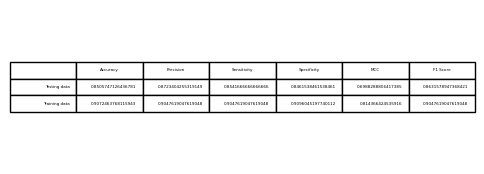

In [12]:
data = {
   '' : ['Testing data', 'Training data'],
   'Accuracy' : [test_accuracy, train_accuracy],
   'Precision' : [test_precision, train_precision],
   'Sensitivity' : [test_recall, train_recall],
   'Specificity' : [specificity, train_specificity],
   'MCC' : [test_mcc, train_mcc],
   'F1 Score' : [test_f1, train_f1]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Save as PNG
plt.savefig("xgbm_results_rfecv.png", bbox_inches='tight', dpi=300)
plt.show()

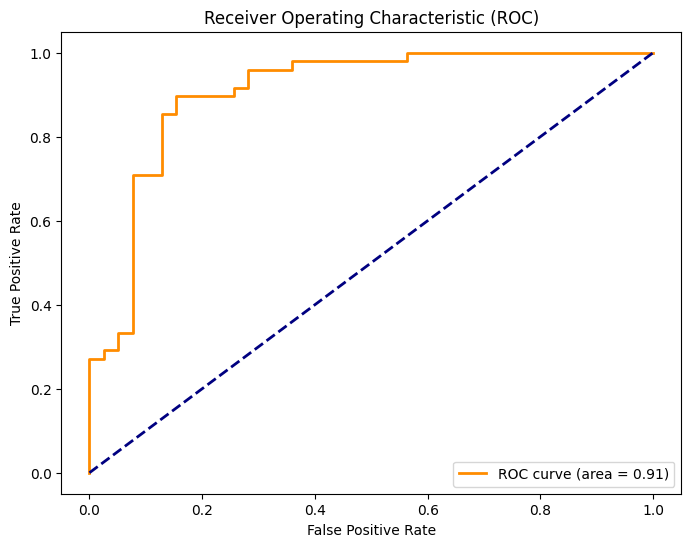

In [13]:
#making an roc-auc curve
y_pred_proba = model.predict_proba(X_test_rfe)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_plot = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Perform cross-validation for X after RFE
scores = cross_val_score(model, X_rfe, y, cv=sss, scoring='f1')

print("Cross-validation scores:", scores)
print("Mean f1 score with RFE:", scores.mean())

d:\iith\python_scripts\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\iith\python_scripts\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\iith\python_scripts\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\iith\python_scripts\venv\Lib\si

Cross-validation scores: [0.73563218 0.72727273 0.80898876 0.8        0.81395349]
Mean f1 score with RFE: 0.7771694327195621


d:\iith\python_scripts\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, 
					ignore_warnings=False, 
					custom_metric=None) 

# fitting data in LazyClassifier 
models, predictions = clf.fit(X_train_rfe, X_test_rfe, 
							y_train, y_test) 



models.to_csv('D:\iith\python_scripts\model_rank_swp_xgbrfecv.csv')

<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Aryan\AppData\Local\Temp\ipykernel_28328\2029975917.py:13: SyntaxWarning: invalid escape sequence '\i'
  models.to_csv('D:\iith\python_scripts\model_rank_swp_xgbrfecv.csv')
 29%|██▉       | 9/31 [00:00<00:00, 27.21it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


100%|██████████| 31/31 [00:01<00:00, 23.81it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'
[LightGBM] [Info] Number of positive: 168, number of negative: 177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2254
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486957 -> initscore=-0.052186
[LightGBM] [Info] Start training from score -0.052186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [30]:
model.fit(X_train_rfefr, y_train)

y_pred = model.predict(X_test_rfefr)

# Evaluate the model on the training set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
test_recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
test_f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
test_mcc = matthews_corrcoef(y_test, y_pred)
# Calculate specificity for the training set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
specificity = TN / (TN + FP)

# Print results for the training set
print(f'Test Set Accuracy: {test_accuracy:.2f}')
print(f'Test Set Precision: {test_precision:.2f}')
print(f'Test Set Sensitivity (Recall): {test_recall:.2f}')
print(f'Test Set Specificity: {specificity:.2f}')
print(f'Test Set F1 Score: {test_f1:.2f}')

Test Set Accuracy: 0.82
Test Set Precision: 0.86
Test Set Sensitivity (Recall): 0.79
Test Set Specificity: 0.85
Test Set F1 Score: 0.83


In [31]:
#Make predictions on the training data
y_train_pred = model.predict(X_train_rfefr)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary', pos_label=1)
train_recall = recall_score(y_train, y_train_pred, average='binary', pos_label=1)
train_f1 = f1_score(y_train, y_train_pred, average='binary', pos_label=1)
train_mcc = matthews_corrcoef(y_train, y_train_pred)

# Calculate specificity for the training set
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_TN = train_conf_matrix[0, 0]
train_FP = train_conf_matrix[0, 1]
train_specificity = train_TN / (train_TN + train_FP)

# Print results for the training set
print(f'Training Set Accuracy: {train_accuracy:.2f}')
print(f'Training Set Precision: {train_precision:.2f}')
print(f'Training Set Sensitivity (Recall): {train_recall:.2f}')
print(f'Training Set Specificity: {train_specificity:.2f}')
print(f'Training Set F1 Score: {train_f1:.2f}')

Training Set Accuracy: 0.88
Training Set Precision: 0.89
Training Set Sensitivity (Recall): 0.86
Training Set Specificity: 0.90
Training Set F1 Score: 0.88


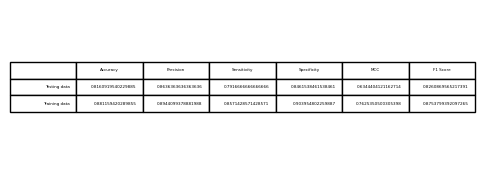

In [32]:
data = {
   '' : ['Testing data', 'Training data'],
   'Accuracy' : [test_accuracy, train_accuracy],
   'Precision' : [test_precision, train_precision],
   'Sensitivity' : [test_recall, train_recall],
   'Specificity' : [specificity, train_specificity],
   'MCC' : [test_mcc, train_mcc],
   'F1 Score' : [test_f1, train_f1]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Save as PNG
plt.savefig("xgbm_results_rfecv_top.png", bbox_inches='tight', dpi=300)
plt.show()

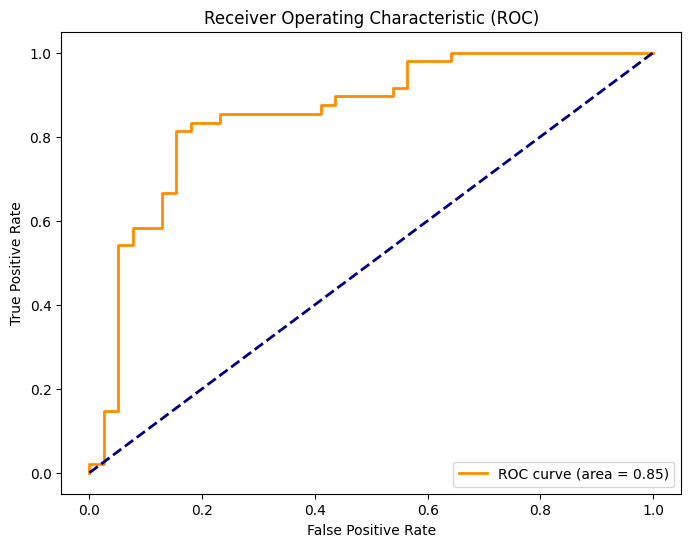

In [33]:
#making an roc-auc curve
y_pred_proba = model.predict_proba(X_test_rfefr)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_plot = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_plot:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Perform cross-validation for X after RFE
scores = cross_val_score(model, X_rfe_fr, y, cv=sss, scoring='f1')

print("Cross-validation scores:", scores)
print("Mean f1 score with RFE:", scores.mean())

Cross-validation scores: [0.69767442 0.71910112 0.725      0.73563218 0.72093023]
Mean f1 score with RFE: 0.7196675917332684
